# <CENTER>**ПРЕДСКАЗАНИЕ ОТКРЫТИЯ ДЕПОЗИТА**

 Банкам хотелось бы уметь выбирать среди своих клиентов именно тех, которые с наибольшей вероятностью воспользуются тем или иным предложением, и связываться именно с ними.

Вам предоставили данные о последней маркетинговой кампании, которую проводил банк: задачей было привлечь клиентов для открытия депозита. Вы должны проанализировать эти данные, выявить закономерность и найти решающие факторы, повлиявшие на то, что клиент вложил деньги именно в этот банк. Если вы сможете это сделать, то поднимете доходы банка и поможете понять целевую аудиторию, которую необходимо привлекать путём рекламы и различных предложений.

> **Бизнес-задача:** 
Определить характеристики, по которым можно выявить клиентов, более склонных к открытию депозита в банке, и за счёт этого повысить результативность маркетинговой кампании.

> **Техническая задача для вас как для специалиста в Data Science:** Построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать, воспользуется он предложением об открытии депозита или нет.

#### ⭐**Основные цели исследования:**
-   Исследовать данные, а не просто вычислить метрики и создать визуализации.

-   Попробовать выявить характерные черты для потенциальных клиентов, чтобы чётко очертить ЦА и увеличить прибыль банка.

-   Проявить фантазию и использовать разные инструменты для повышения качества прогноза.

---

### <center>**ОРГАНИАЦИЯ ПРОЕКТА**

> **1. Первичная обработка данных:** В рамках этой части вам предстоит обработать пропуски и выбросы в данных. Это необходимо для дальнейшей работы с ними.

> **2. Разведывательный анализ данных (EDA):** Вам необходимо будет исследовать данные, нащупать первые закономерности и выдвинуть гипотезы.

> **3. Отбор и преобразование признаков:** На этом этапе вы перекодируете и преобразуете данные таким образом, чтобы их можно было использовать при решении задачи классификации. Если на первом этапе вы лишь избавите данные от ненужных артефактов, то на этом шаге совершите действия, более важные для подготовки данных к задаче классификации, уже понимая их структуру.

> **4. Решение задачи классификации: логистическая регрессия и решающие деревья:** На данном этапе вы построите свою первую прогностическую модель и оцените её качество. Вы научитесь подбирать оптимальные параметры модели для того, чтобы получить наилучший результат для конкретного алгоритма.

> **5. Решение задачи классификации: ансамбли моделей и построение прогноза:** На заключительном этапе вы сможете доработать своё предсказание с использованием более сложных алгоритмов и оценить, с помощью какой модели возможно сделать более качественные прогнозы.

---

### <center>**ЗНАКОМСТВО С ДАННЫМИ**

> **Данные о клиентах банка:**

-   age (возраст);

-   job (сфера занятости);

-   marital (семейное положение);

-   education (уровень образования);

-   default (имеется ли просроченный кредит);

-   housing (имеется ли кредит на жильё);

-   loan (имеется ли кредит на личные нужды);

-   balance (баланс).

> **Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:**

-   contact (тип контакта с клиентом);

-   month (месяц, в котором был последний контакт);

-   day (день, в который был последний контакт);

-   duration (продолжительность контакта в секундах).

> **Прочие признаки:**

-   campaign (количество контактов с этим клиентом в течение текущей кампании);

-   pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);

-   previous (количество контактов до текущей кампании).

-   poutcome (результат прошлой маркетинговой кампании).

И, разумеется, наша целевая переменная ***deposit***, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.

# Проект: классификация

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import optuna
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
import category_encoders as ce 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

palette = sns.color_palette('pastel')
plt.rcParams['font.size'] = 14

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [151]:
df = pd.read_csv('bank_fin/bank_fin.csv', sep = ';')

In [152]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
df.info()
print("\nКоличество пропущенных значений в balance: {}".format(
    df['balance'].isnull().sum()
))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB

Количество пропущенных значений в balance: 25


-   Обнаруженны пропуски в признаке *balance*;
-   Всего наблюдений в датасете 11 162;
-   Кол-во пропусков = 25;

### Задание 2

In [153]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
display(df['job'].unique())

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

-   В признаке *job* тоже есть пропуски, но они закодированы словом *unknown*;

### Задание 3

In [154]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
print(df['balance'].head(), end='\n\n')

df['balance'] = (df['balance']
                 .str.replace(r'[\$\s]', '', regex=True)
                 .str.replace(',', '.')
                 ).astype(float)
df.balance.head()
print("Cреднее значение balance: {:.3f}".format(df.balance.mean()))

0     2 343,00 $ 
1        45,00 $ 
2     1 270,00 $ 
3     2 476,00 $ 
4       184,00 $ 
Name: balance, dtype: object

Cреднее значение balance: 1529.129


### Задание 4

In [155]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
display(df.balance.describe())

df['balance'] = df.balance.fillna(df.balance.median())
print("Среднее значение balance: {:.3f}".format(df.balance.mean()))

count    11137.000000
mean      1529.129029
std       3228.114892
min      -6847.000000
25%        123.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

Среднее значение balance: 1526.936


-   в виде среднего выборочного будем использовать медианну 

### Задание 5

In [156]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
popular_education = df.education.mode().iloc[0]
popular_job = df.job.mode().iloc[0]

print(df.education.unique(), end='\n\n')

# декодируем пропуски в исходный вид
df['education'] = df.education.replace('unknown', pd.NA)
df['job'] = df.job.replace('unknown', pd.NA)

df = df.fillna({
    'job': df.job.mode().iloc[0],
    'education': df.education.mode().iloc[0]
})

mask1 = df.education == popular_education
mask2 = df.job == popular_job
print("""Cредний баланс для клиентов с самой популярной работой
и самым популярным уровнем образования: {:.3f}""".format(
    df[mask1 & mask2].balance.mean()))

['secondary' 'tertiary' 'primary' 'unknown']

Cредний баланс для клиентов с самой популярной работой
и самым популярным уровнем образования: 1598.883


### Задание 6

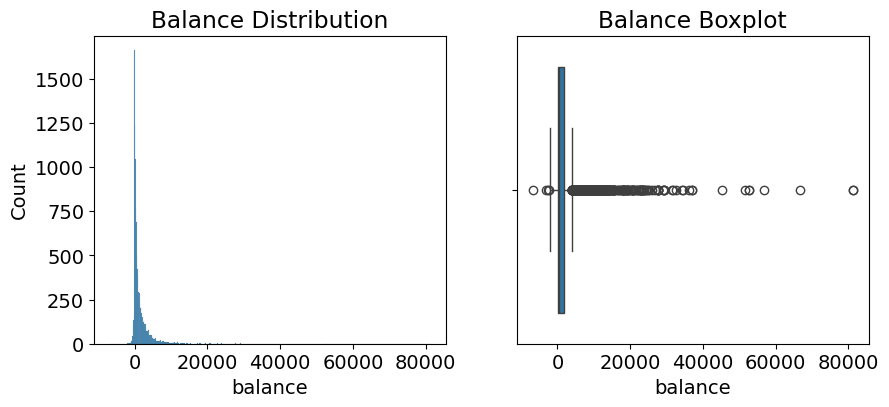

In [157]:
# визуалируем распределение balance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# дальнейшие действия 
histplot = sns.histplot(data=df, x='balance', ax=axes[0]);
histplot.set_title('Balance Distribution');

boxplot = sns.boxplot(data=df, x='balance', ax=axes[1]);
boxplot.set_title('Balance Boxplot');


In [158]:
# удалите все выбросы для признака balance

# функция по поиску выбросов по методу Тьюки
def outliers_iqr(data, feature): 
    x = data[feature]
    # 25-ый и 75-ый квантиль
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    # межквартильное расстояние
    iqr = quartile_3 - quartile_1
    # верхняя и нижняя границпа ТЬюки
    global lower_bound, upper_bound
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, df_cleaned = outliers_iqr(df, 'balance')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {df_cleaned.shape[0]}', end='\n\n')

print("Нижняя граница: {:.0f}\nВерхняя граница: {:.0f}".format(
    lower_bound, upper_bound
))



Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10105

Нижняя граница: -2241
Верхняя граница: 4063


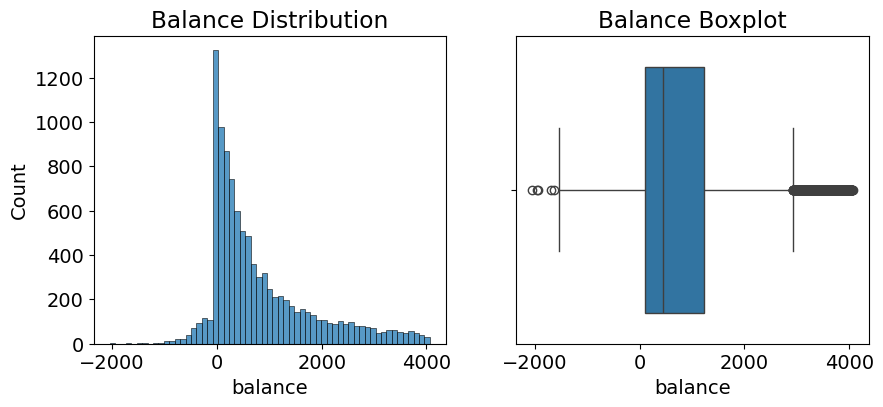

In [159]:
# визуалируем распределение balance после удаления выбросов
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# дальнейшие действия 
histplot = sns.histplot(data=df_cleaned, x='balance', ax=axes[0]);
histplot.set_title('Balance Distribution');

boxplot = sns.boxplot(data=df_cleaned, x='balance', ax=axes[1]);
boxplot.set_title('Balance Boxplot');


## Часть 2:  Разведывательный анализ

### Задание 1

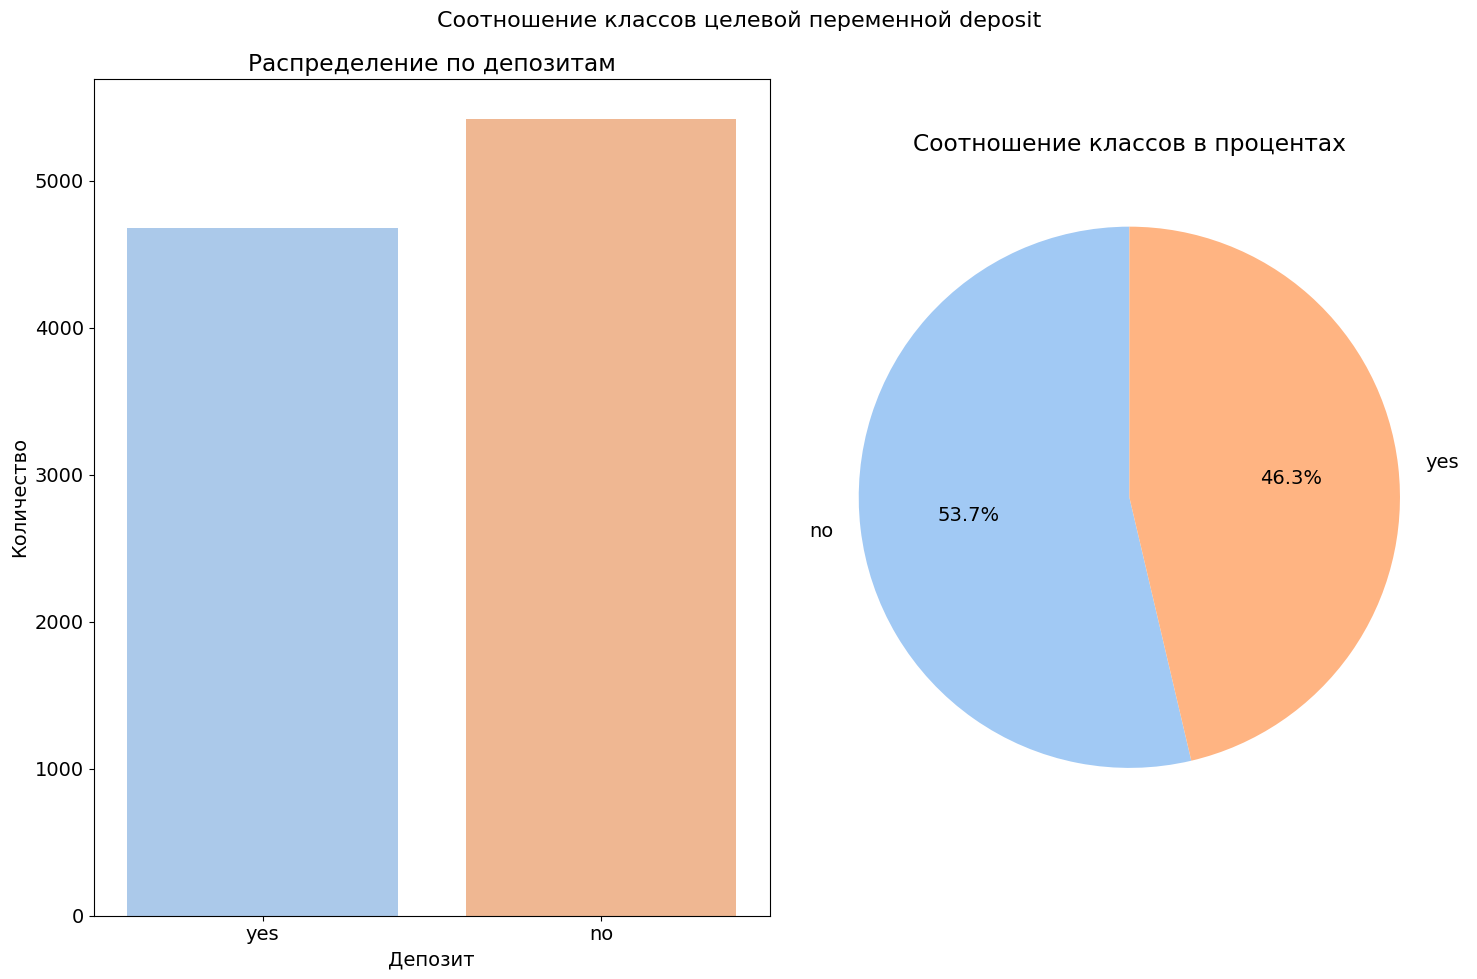

deposit
no     5424
yes    4681
Name: count, dtype: int64


In [160]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Первый график - столбчатая диаграмма
sns.countplot(
    data=df_cleaned,
    x='deposit',
    ax=axes[0],
    hue='deposit',
    palette=palette
)
axes[0].set(xlabel='Депозит', ylabel='Количество')
axes[0].set_title('Распределение по депозитам')

# Второй график - круговая диаграмма с процентами
deposit_counts = df_cleaned['deposit'].value_counts()
axes[1].pie(deposit_counts.values, 
           labels=deposit_counts.index, 
           autopct='%1.1f%%', 
           colors=palette,
           startangle=90)
axes[1].set_title('Соотношение классов в процентах')

# Общий заголовок
plt.suptitle("Соотношение классов целевой переменной deposit", fontsize=16)
plt.tight_layout()
plt.show()

print(deposit_counts)

### Задания 2 и 3

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


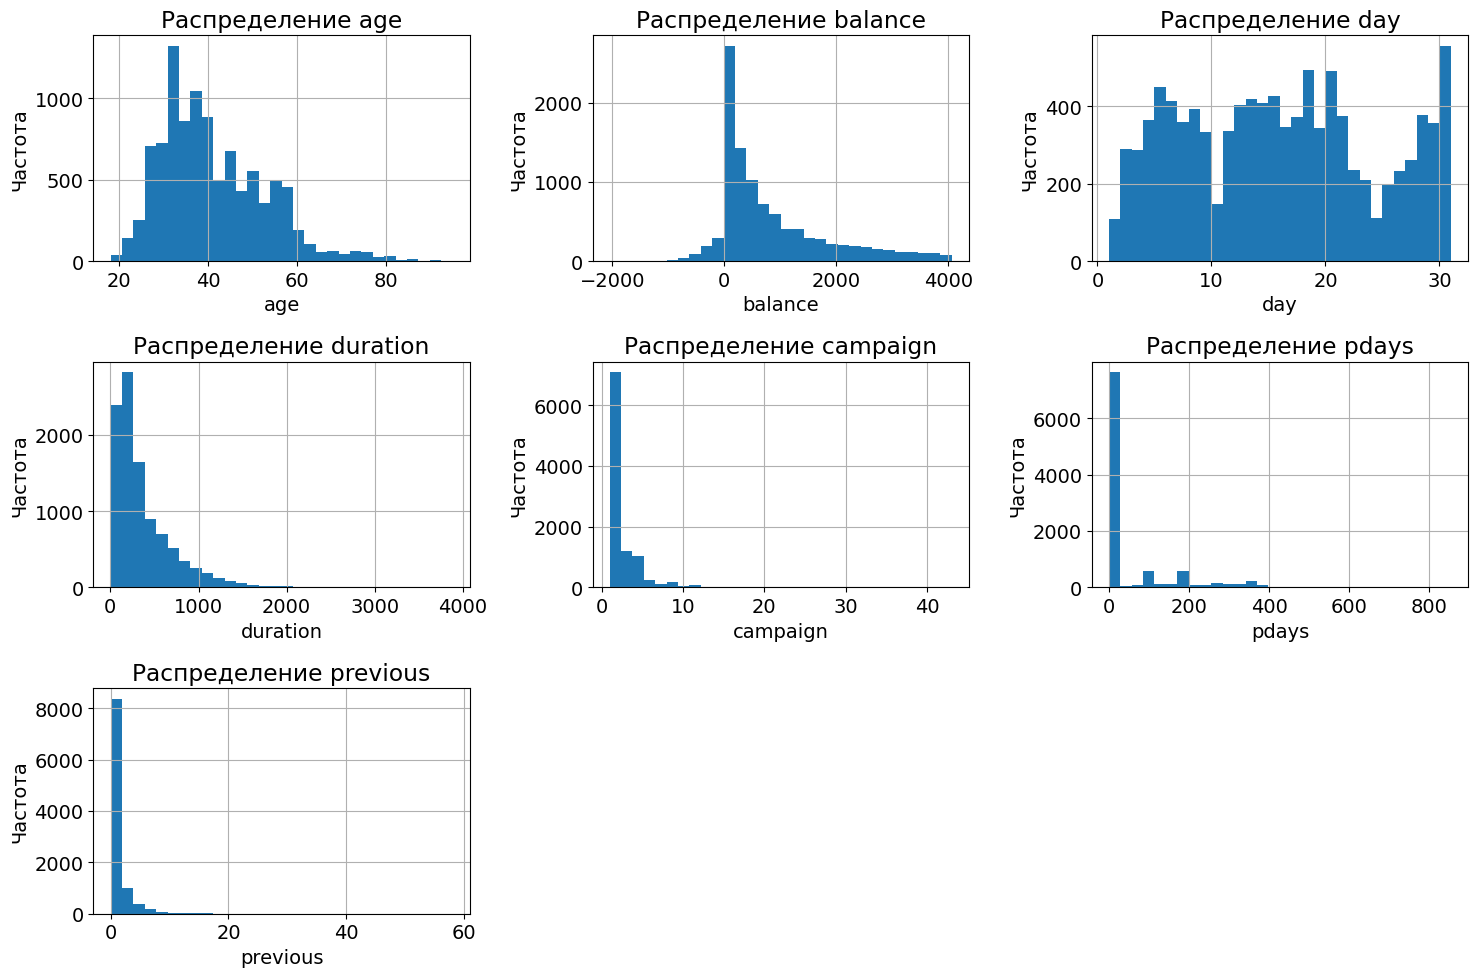

In [161]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
display(df_cleaned.describe())

# Визуализация распределения количественных переменных
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    df_cleaned[col].hist(bins=30)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    
plt.tight_layout()
plt.show()

Баланс (balance): Есть отрицательные значения (мин. -2049) — ошибка данных.

Длительность (duration): Сильные выбросы (макс. 3881 сек ≈ 65 мин, мин. 2сек).

Число контактов (campaign): Аномальные значения (макс. 43 контакта).

Прошлые контакты (previous): Выбросы (макс. 58) — нереалистично много.


### Задания 4 и 5

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


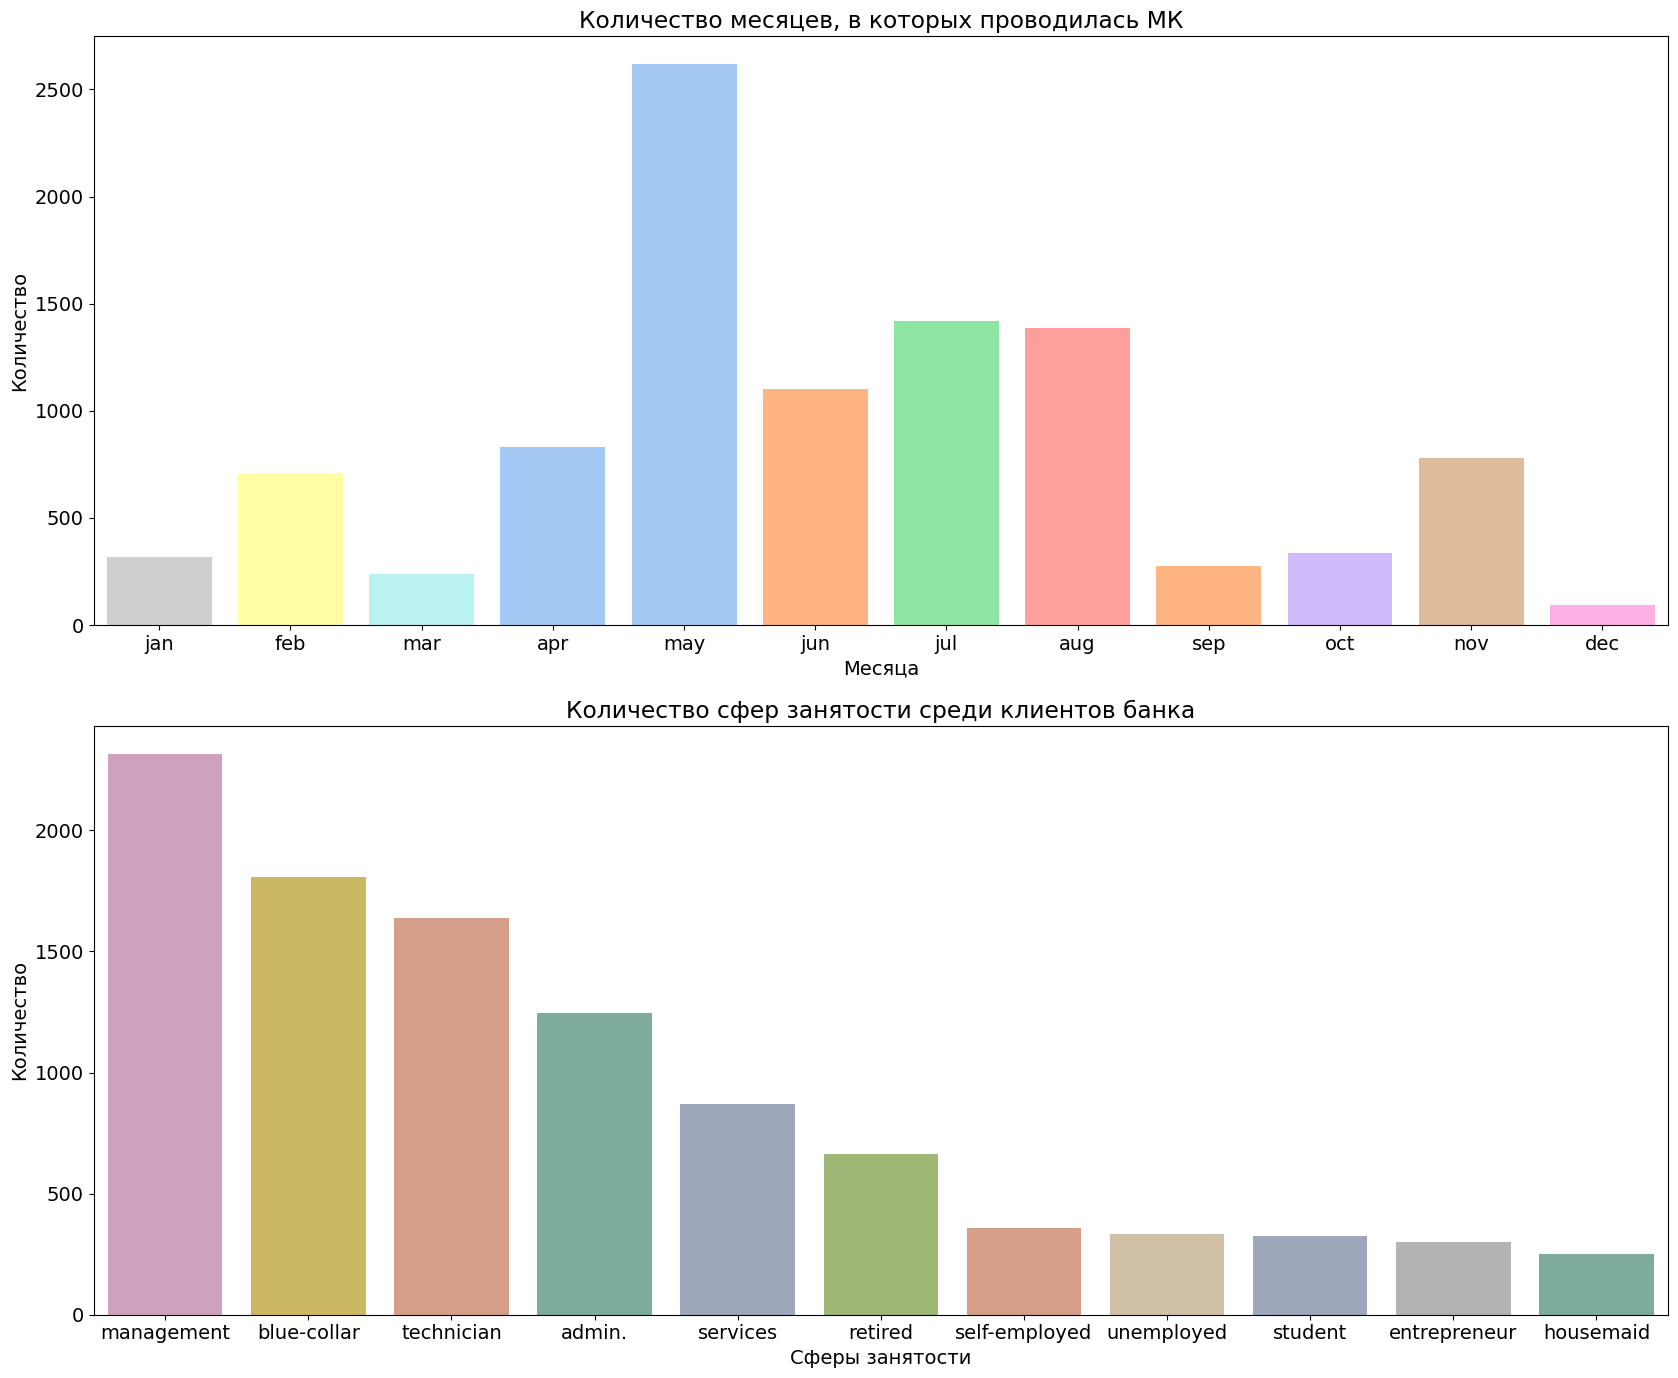

In [162]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
display(df_cleaned.describe(include=object))

# Правильный порядок месяцев
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# Сортируем данные по убыванию частоты
job_order = df_cleaned['job'].value_counts().index

#построим визуализации
fig, axes = plt.subplots(2, 1, figsize=(17,14))

sns.countplot(
    data=df_cleaned,
    x='month',
    ax=axes[0],
    hue='month',
    palette='pastel',
    saturation=1,
    order=month_order
)
axes[0].set_title("Количество месяцев, в которых проводилась МК")
axes[0].set(xlabel='Месяца', ylabel='Количество')

sns.countplot(
    data=df_cleaned,
    x='job',
    ax=axes[1],
    hue='job',
    palette='Set2',
    saturation=0.5,
    order=job_order
)
axes[1].set_title("Количество сфер занятости среди клиентов банка")
axes[1].set(xlabel='Сферы занятости', ylabel='Количество')
plt.tight_layout()
plt.show()



### Задание 6

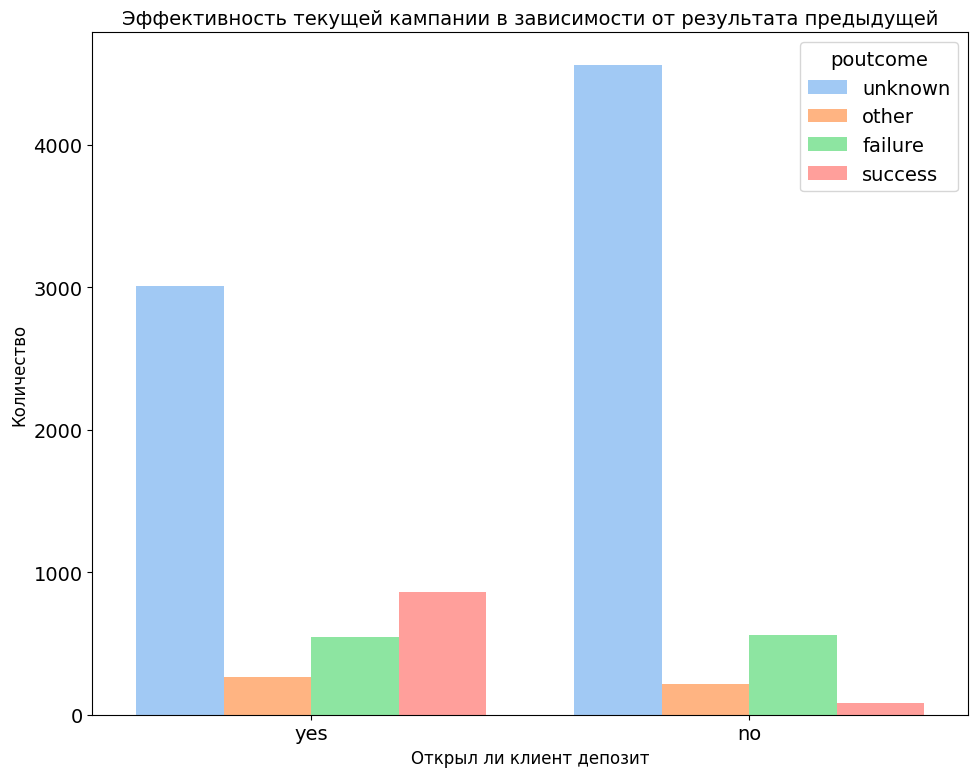

In [163]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
df_cleaned.poutcome.value_counts()

plt.figure(figsize=(10,8))
sns.countplot(
    data=df_cleaned,
    x='deposit',
    hue='poutcome',
    palette=palette,
    saturation=1)
plt.title('Эффективность текущей кампании в зависимости от результата предыдущей', fontsize=14)
plt.xlabel('Открыл ли клиент депозит', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.tight_layout()
plt.show()

-   мало тех, кто в предыдущей компании имеет статус 'success', а в текущей не отрыл депозит

-   гораздо больше тех, кто в предыдущей имеет статус 'sucess', и в текущей открыл депозит

### Задание 7

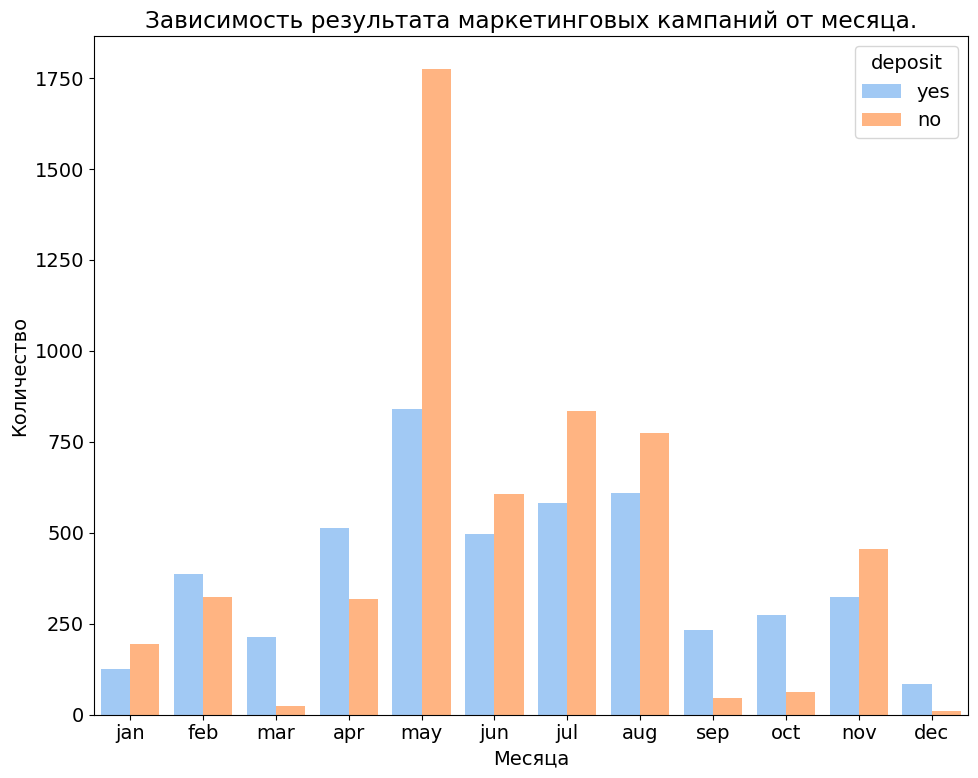

In [164]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
plt.figure(figsize=(10,8))
sns.countplot(
    data=df_cleaned,
    x='month',
    hue='deposit',
    palette='pastel',
    saturation=1,
    order=month_order
)
plt.title("Зависимость результата маркетинговых кампаний от месяца.")
plt.xlabel('Месяца')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

### Задание 8

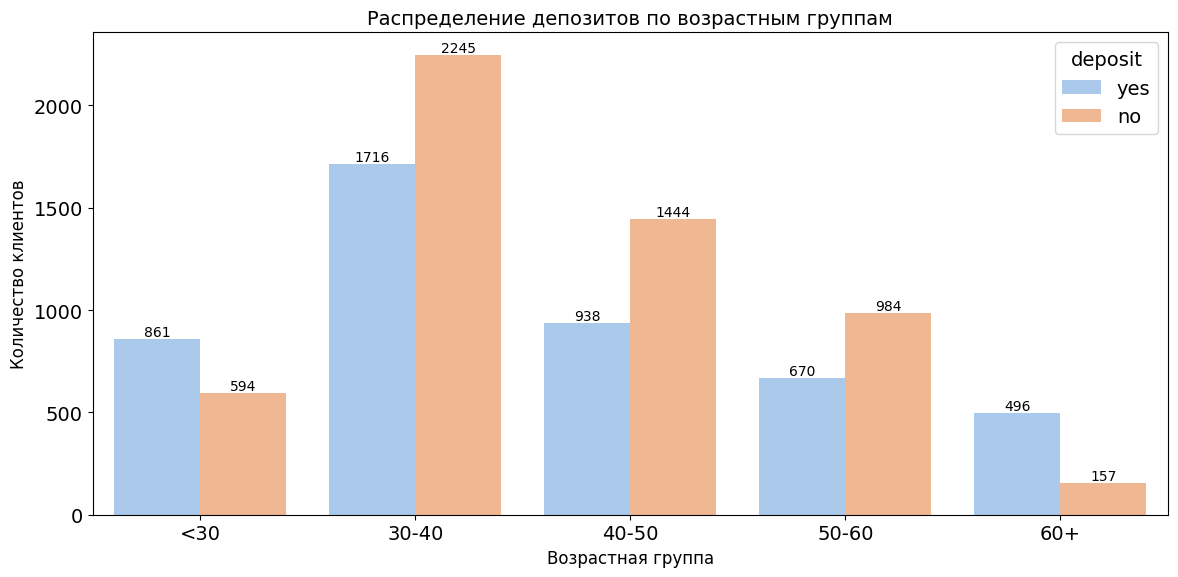

In [165]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

# Создаем возрастные группы с помощью pd.cut
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']

df_cleaned['age_group'] = pd.cut(df_cleaned['age'], 
                                bins=age_bins, 
                                labels=age_labels, 
                                right=False)

# Строим группированный barplot
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=df_cleaned,
    x='age_group',
    hue='deposit',
    palette='pastel'
)

plt.title('Распределение депозитов по возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)

# Добавляем подписи значений
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10)

plt.tight_layout()
plt.show()

### Задания 9 и 10

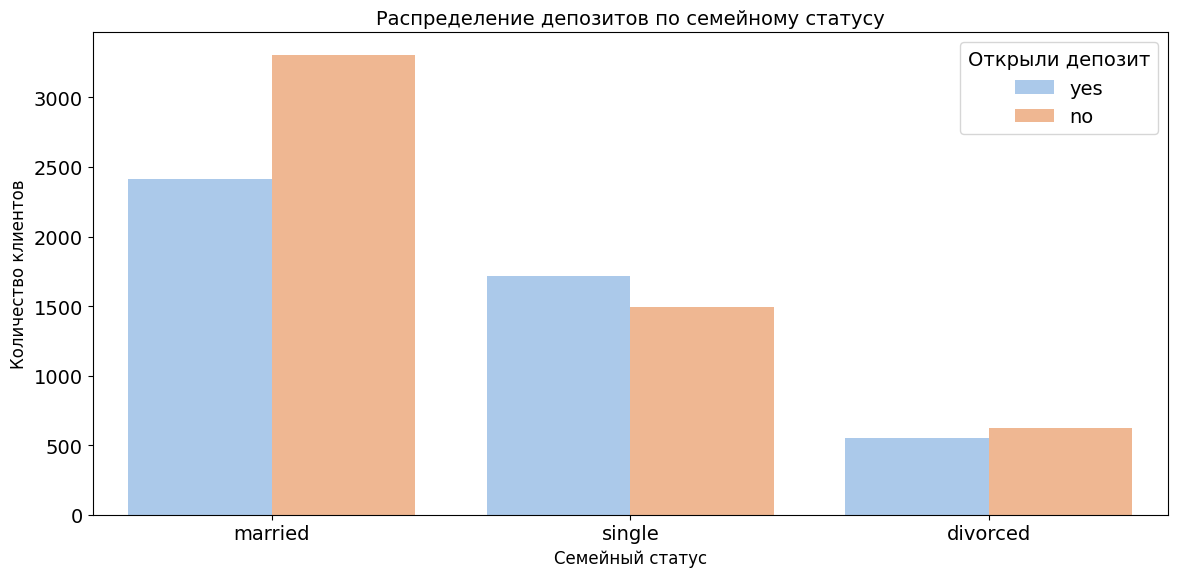

In [166]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
# Строим группированную столбчатую диаграмму
plt.figure(figsize=(12, 6))

sns.countplot(
    data=df_cleaned,
    x='marital',
    hue='deposit',
    palette='pastel'
)

plt.title('Распределение депозитов по семейному статусу', fontsize=14)
plt.xlabel('Семейный статус', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.legend(title='Открыли депозит')
plt.tight_layout()
plt.show()

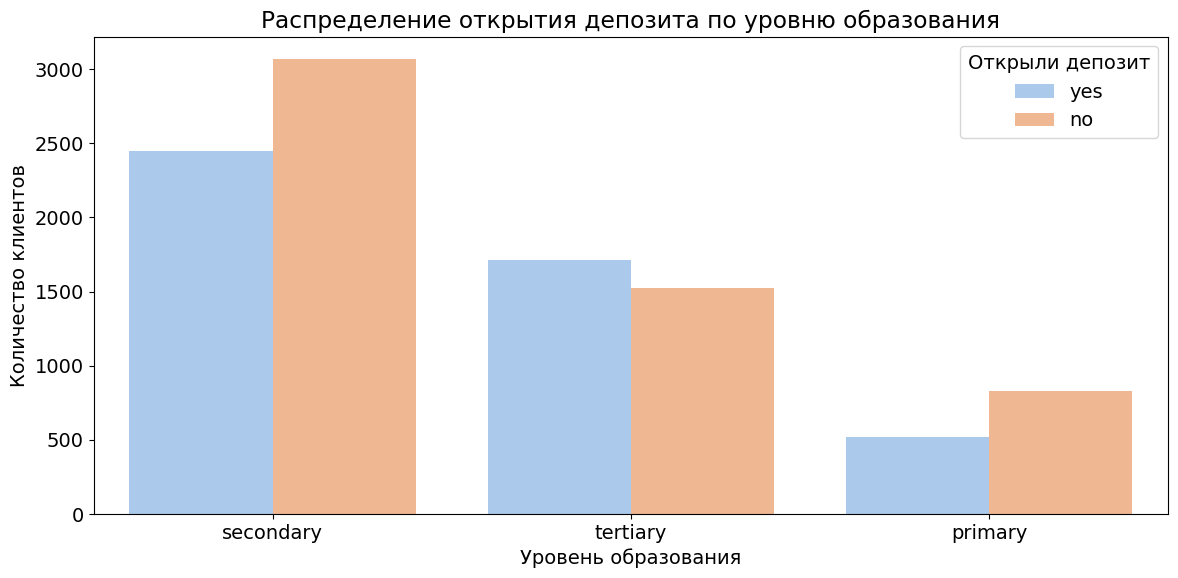

In [167]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_cleaned,
    x='education',
    hue='deposit',
    palette='pastel')
plt.title('Распределение открытия депозита по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество клиентов')
plt.legend(title='Открыли депозит')
plt.tight_layout()
plt.show()

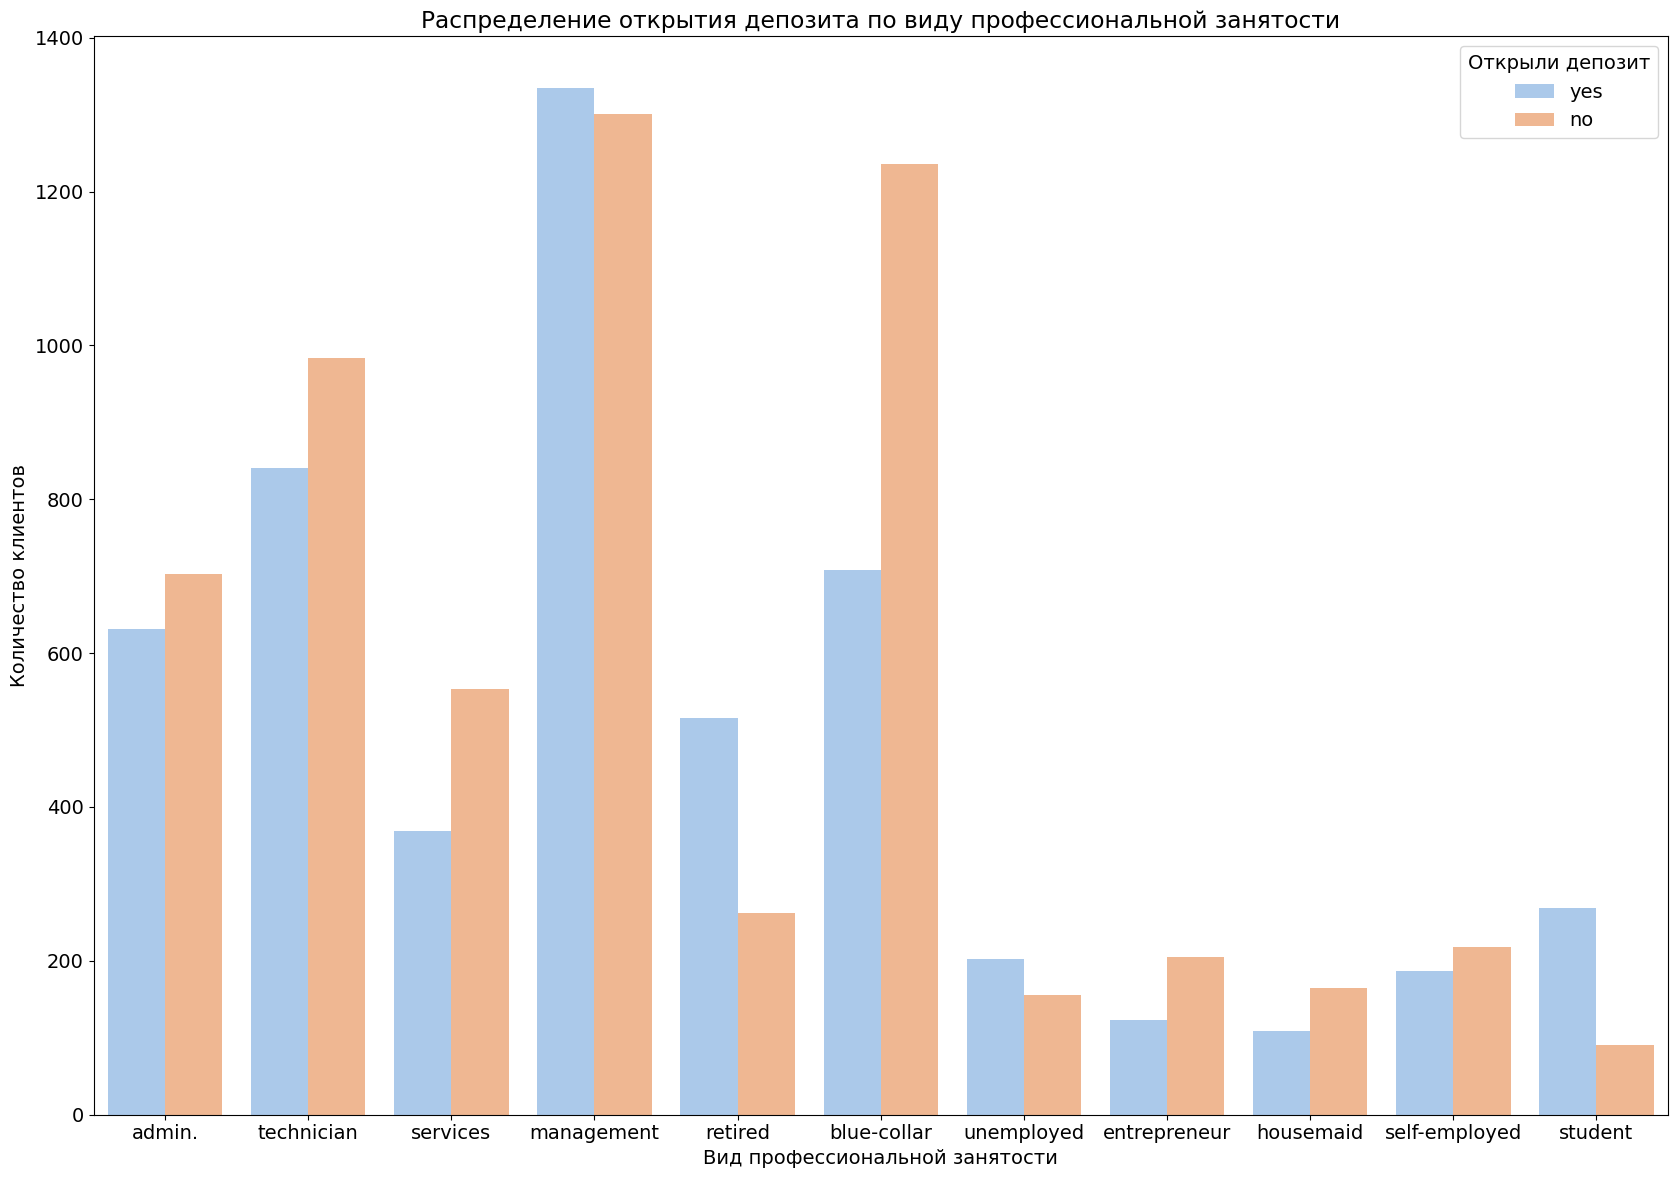

In [168]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
plt.figure(figsize=(17, 12))
sns.countplot(
    data=df,
    x='job',
    hue='deposit',
    palette='pastel')
plt.title('Распределение открытия депозита по виду профессиональной занятости')
plt.xlabel('Вид профессиональной занятости')
plt.ylabel('Количество клиентов')
plt.legend(title='Открыли депозит')
plt.tight_layout()
plt.show()

In [169]:
df_cleaned['education'].value_counts()

education
secondary    5517
tertiary     3239
primary      1349
Name: count, dtype: int64

### Задание 11

marital,divorced,married,single
education,,,
primary,96,339,82
secondary,283,1289,879
tertiary,174,784,755


marital,divorced,married,single
education,,,
primary,91,641,100
secondary,370,1830,866
tertiary,163,832,531


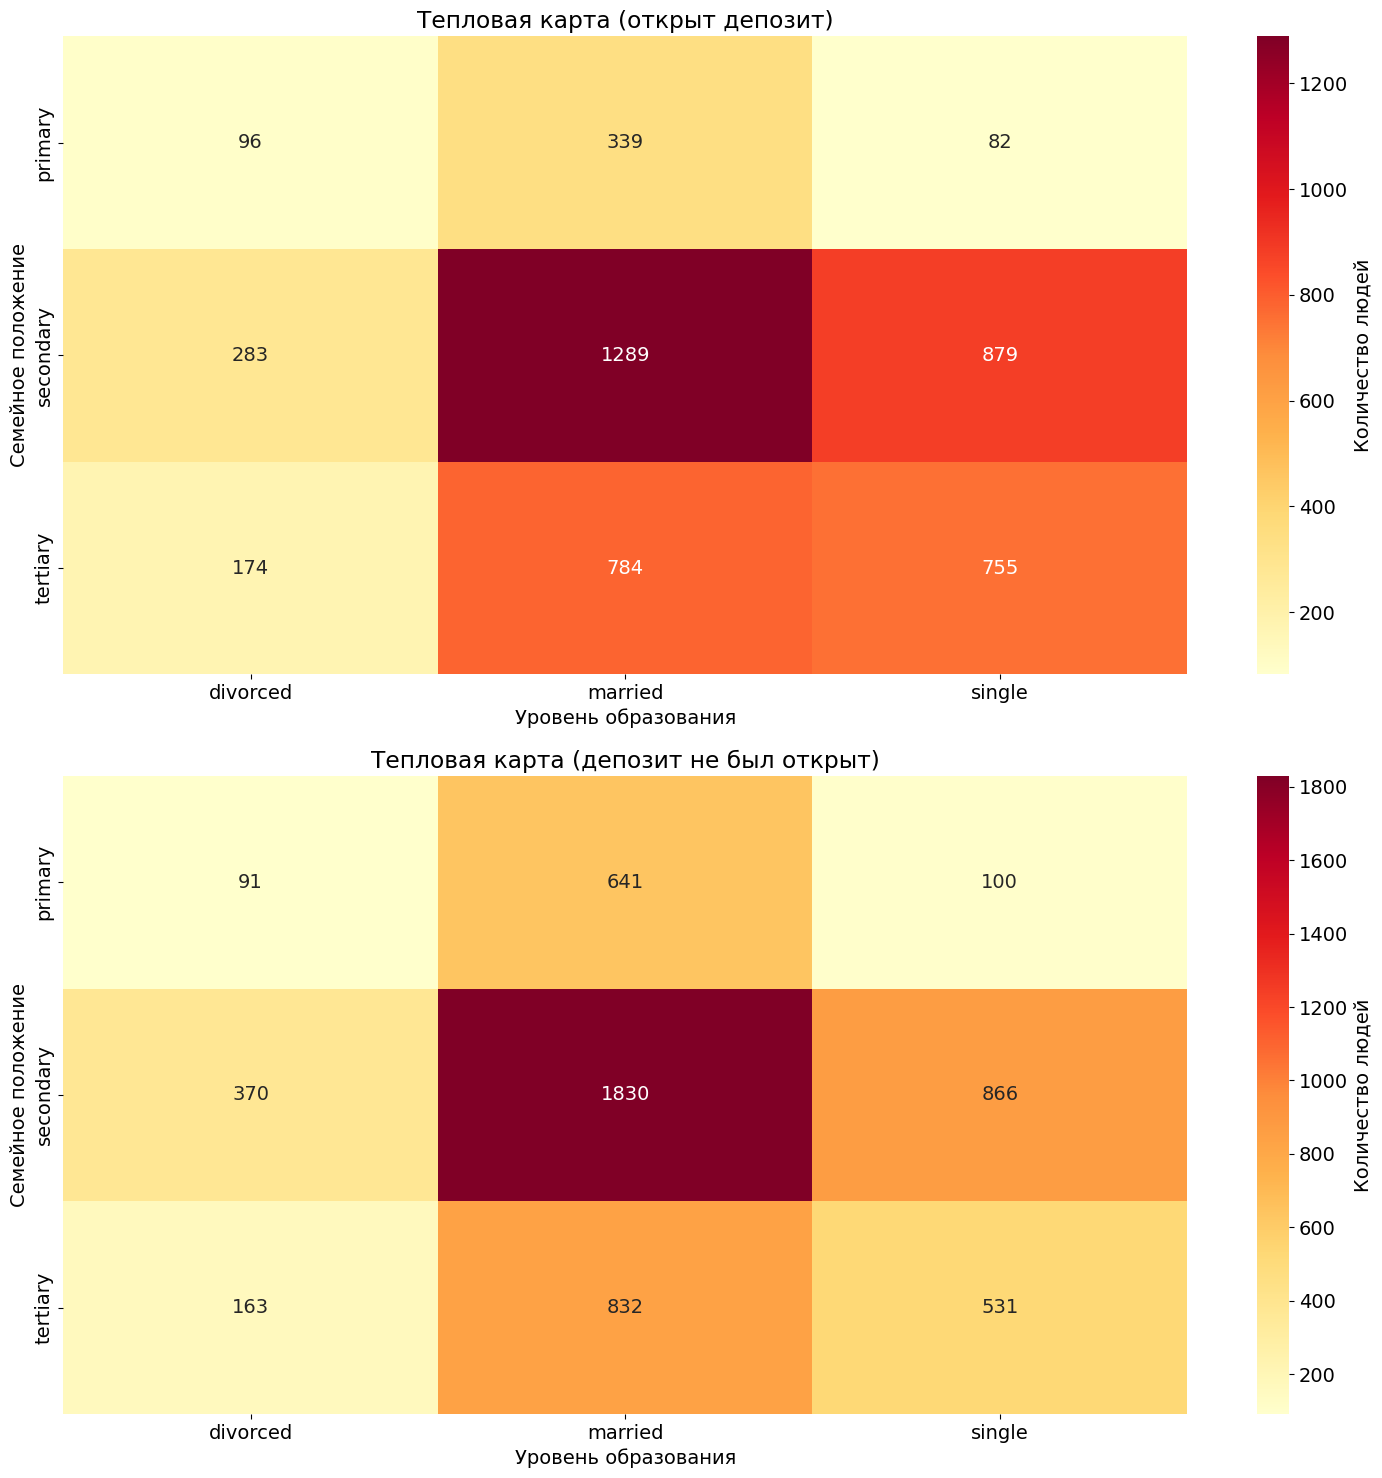

In [170]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)


pos_1 = df_cleaned[df_cleaned.deposit == 'yes'][['education','marital','deposit']]
pos_2 = df_cleaned[df_cleaned.deposit == 'no'][['education','marital','deposit']] 

cross_1 = pd.crosstab(pos_1['education'], pos_1['marital']) #согласившиеся открыть депозит
cross_2 = pd.crosstab(pos_2['education'], pos_2['marital']) #отказавшиеся открыть депозит
display(cross_1)

display(cross_2)

# визуализация 
fig, axes = plt.subplots(2,1, figsize=(15, 15))

sns.heatmap(
    data=cross_1,
    annot=True,
    cmap='YlOrRd',
    ax=axes[0],
    cbar_kws={'label': 'Количество людей'},
    fmt='d'
)
axes[0].set_title("Тепловая карта (открыт депозит)")
axes[0].set(xlabel='Уровень образования', ylabel='Семейное положение')

sns.heatmap(
    data=cross_2,
    annot=True,
    cmap='YlOrRd',
    ax=axes[1],
    cbar_kws={'label': 'Количество людей'},
    fmt='d'
)
axes[1].set_title("Тепловая карта (депозит не был открыт)")
axes[1].set(xlabel='Уровень образования', ylabel='Семейное положение')
plt.tight_layout()
plt.show()

Особого отличия не обнаруженно! В обоих случая превалирует количество людей с комбинацией (одинок и имеет высшее образование)

**Каких людей среди открывших депозит больше: одиноких с высшим образованием или разведённых с более низким уровнем образования?**
-   Одиноких с высшем образованием

## Часть 3: преобразование данных

### Задание 1

In [171]:
df_cleaned.age_group.value_counts()

age_group
30-40    3961
40-50    2382
50-60    1654
<30      1455
60+       653
Name: count, dtype: int64

In [172]:
# преобразуйте уровни образования
LE = LabelEncoder()

df_cleaned['education'] = LE.fit_transform(df_cleaned['education'])
print("Cумма получившихся значений: {}".format(
    df_cleaned['education'].sum()))

# преобразуем возростную группу
OE = ce.OrdinalEncoder(mapping=[{
    'col': 'age_group',
    'mapping': {'<30': 0,
                '30-40': 1,
                '40-50': 2,
                '50-60': 3,
                '60+': 4}
}])

# применяем трансформацию к столбцу
data_bin = OE.fit_transform(df_cleaned['age_group'])
# добавляем результат к исходному DataFrame
df_cleaned['age_group'] = data_bin

df_cleaned.head()

Cумма получившихся значений: 11995


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,1,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,3
1,56,admin.,married,1,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,3
2,41,technician,married,1,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2
3,55,services,married,1,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,3
4,54,admin.,married,2,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes,3


### Задания 2 и 3

In [173]:
# преобразуйте бинарные переменные в представление из нулей и единиц
print("Бинарные факторы:")
bin_cols = []
for col in df_cleaned.columns:
    if len(df_cleaned[col].unique())==2:
        bin_cols.append(col)
        
print(bin_cols)

func = lambda x: 1 if x=='yes' else 0
# имеется ли просроченный кредит 
df_cleaned['default'] = df_cleaned['default'].apply(func)

# имеется ли кредит на жилье
df_cleaned['housing'] = df_cleaned['housing'].apply(func)

# имеется ли кредит на личные нужды
df_cleaned['loan'] = df_cleaned['loan'].apply(func)

# имеется ли кредит на личные нужды
df_cleaned['deposit'] = df_cleaned['deposit'].apply(func)

print('\nСтандартное отклонение deposit: {:.3f}'.format(df_cleaned.deposit.std()))

# Вычислите среднее арифметическое для каждой из получившихся переменных,
# сложите три результата и в качестве ответа впишите итог,
# округлив его до трёх знаков после точки-разделителя.
bin_cols.remove('deposit')
      
summ = 0
for col in bin_cols:
    summ += df_cleaned[col].mean()
print("Получившаяся сумма: {:.3f}".format(summ))


Бинарные факторы:
['default', 'housing', 'loan', 'deposit']

Стандартное отклонение deposit: 0.499
Получившаяся сумма: 0.635


### Задание 4

In [174]:
nominal_cols = df_cleaned.select_dtypes(include=['object']).columns
print(nominal_cols, end='\n\n')

print("Количество уникальных значений:")
for col in nominal_cols:
    print(col, df_cleaned[col].nunique())
    
# Создаем dummy-переменные
dummies = pd.get_dummies(df_cleaned[nominal_cols])

# Добавляем dummy-переменные
df_with_dummies = pd.concat([df_cleaned, dummies], axis=1)
print(f"\nКоличество признаков в датасете (до удаления исх. призн.): {df_with_dummies.shape[1]}")

# Удаляем исходные номинальные столбцы
df_with_dummies = df_with_dummies.drop(columns=nominal_cols, axis=1)
print(f"Количество признаков в датасете (после удаления исх. призн.): {df_with_dummies.shape[1]}")

Index(['job', 'marital', 'contact', 'month', 'poutcome'], dtype='object')

Количество уникальных значений:
job 11
marital 3
contact 3
month 12
poutcome 4

Количество признаков в датасете (до удаления исх. призн.): 51
Количество признаков в датасете (после удаления исх. призн.): 46


### Задания 5 и 6

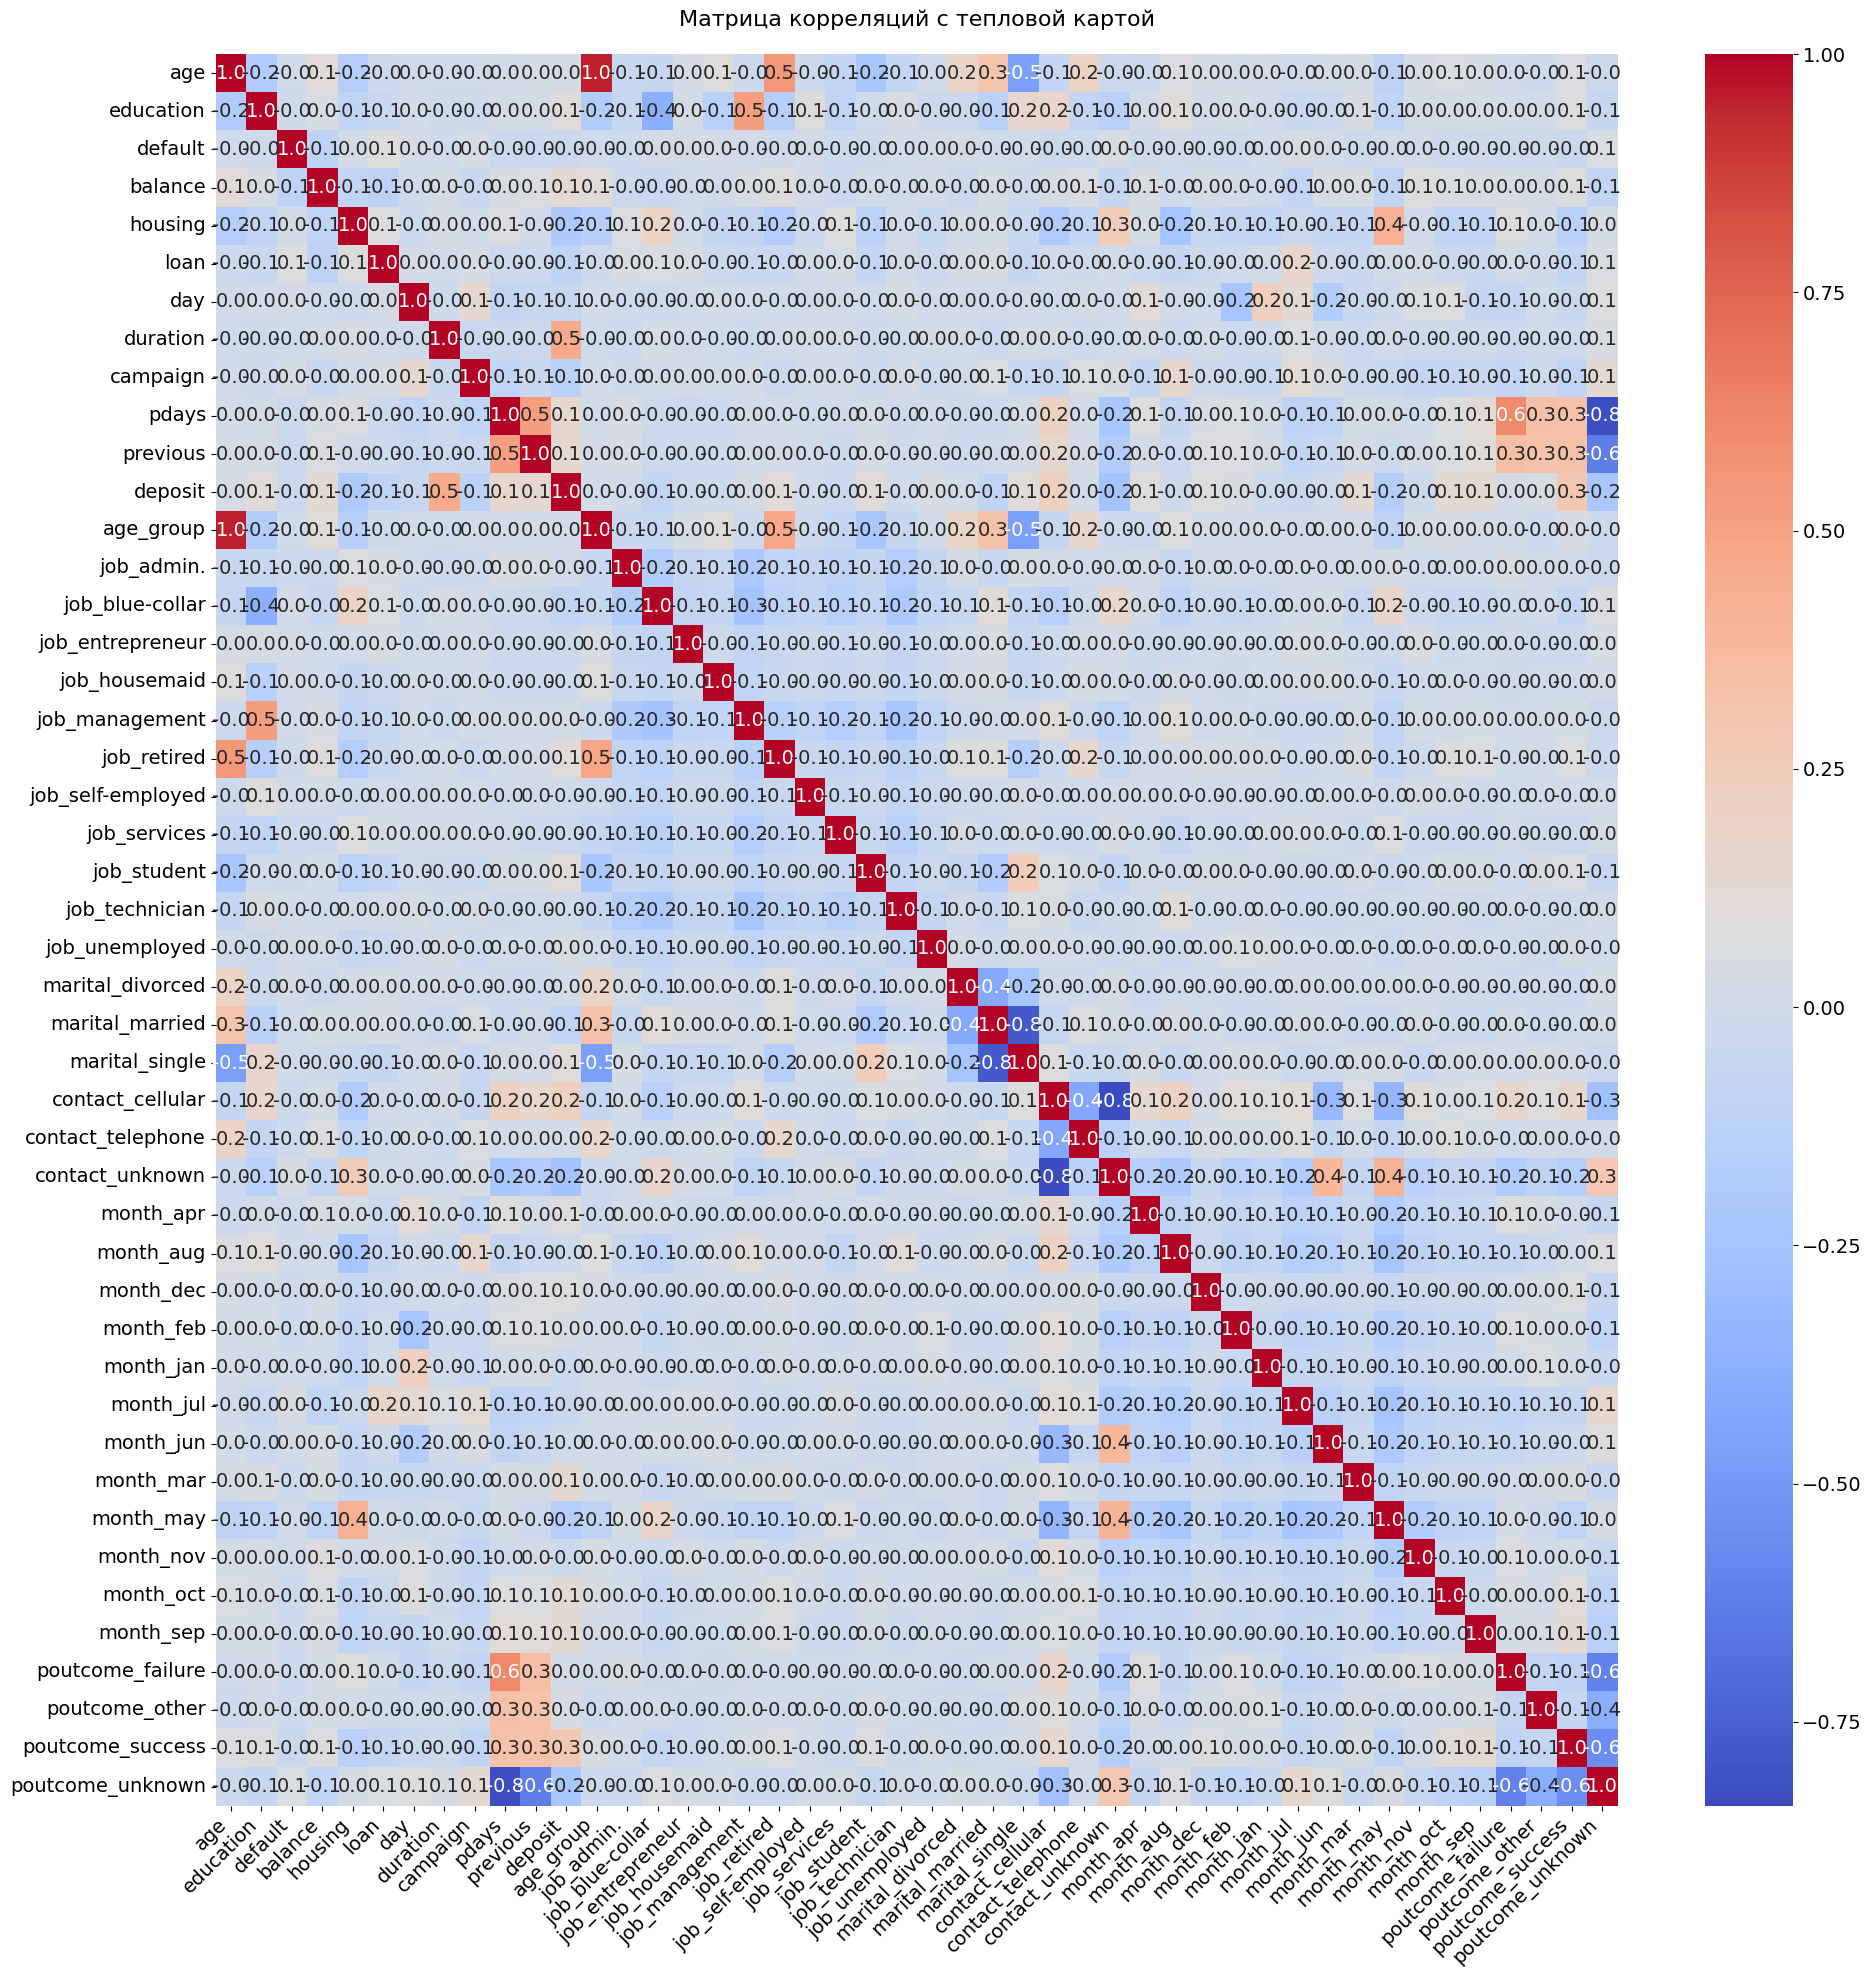

In [175]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

# Вычисляем матрицу корреляций
correlation_matrix = df_with_dummies.corr(numeric_only=True)

# тепловая карта
plt.figure(figsize=(20, 20))

sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.1f'
)
plt.title('Матрица корреляций с тепловой картой', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

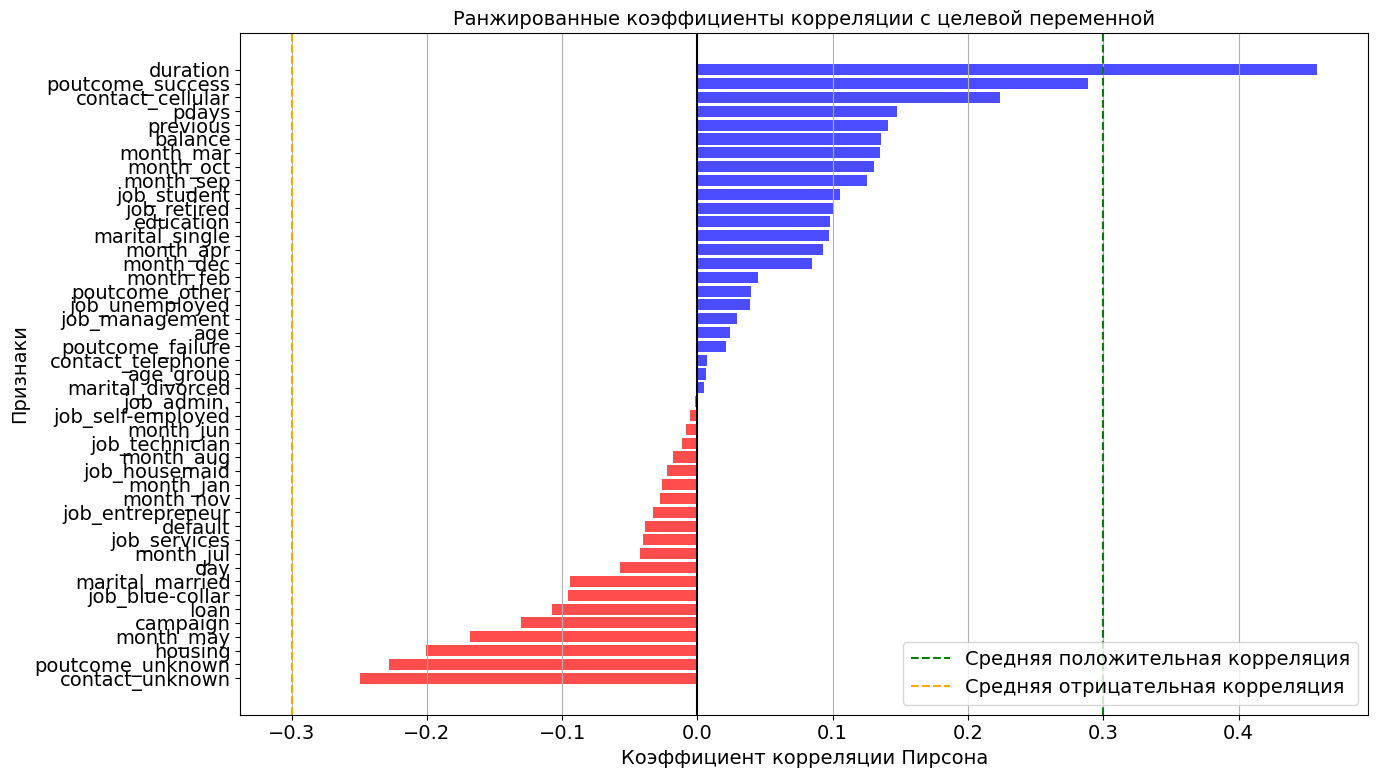

In [176]:
# Корреляции с целевой переменной
target_correlations = correlation_matrix['deposit'].sort_values(ascending=False)


plt.figure(figsize=(14, 8))

# Убираем саму целевую переменную из списка
target_corr_sorted = target_correlations.drop('deposit').sort_values(ascending=True)

colors = ['red' if x < 0 else 'blue' for x in target_corr_sorted.values]

plt.barh(target_corr_sorted.index, target_corr_sorted.values, color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-', alpha=1)
plt.axvline(x=0.3, color='green', linestyle='--', alpha=1, label='Средняя положительная корреляция')
plt.axvline(x=-0.3, color='orange', linestyle='--', alpha=1, label='Средняя отрицательная корреляция')

plt.xlabel('Коэффициент корреляции Пирсона')
plt.ylabel('Признаки')
plt.title('Ранжированные коэффициенты корреляции с целевой переменной', fontsize=14)
plt.legend()
plt.grid(axis='x', alpha=1)
plt.tight_layout()
plt.show()

### Задания 7 и 8

In [177]:
X = df_with_dummies.drop(['deposit'], axis=1)
y = df_with_dummies['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [178]:
# рассчитайте необходимые показатели
print(f"Размер тестовой выборки: {X_test.shape[0]}")

print("Среднне значение целевой переменной на тестовой выборке: {:.2f}".format(
    np.mean(y_test)
))

Размер тестовой выборки: 3335
Среднне значение целевой переменной на тестовой выборке: 0.46


### Задание 9

In [179]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

# Инициализируем SelectKBest
k_best = SelectKBest(score_func=f_classif, k=15)

# Применяем к обучающей выборке
X_train_selected = k_best.fit_transform(X_train, y_train)

# получаем названия наиболее подходящих признаков
features = k_best.get_feature_names_out() 
print(features)

X = df_with_dummies[features]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    random_state=42,
    test_size=0.33
)

['balance' 'housing' 'loan' 'duration' 'campaign' 'pdays' 'previous'
 'contact_cellular' 'contact_unknown' 'month_mar' 'month_may' 'month_oct'
 'month_sep' 'poutcome_success' 'poutcome_unknown']


### Задание 10

In [180]:
# нормализуйте данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Среднее арифметическое для первого предиктора тестовой выборки {:.2f}".format(
    X_test[:, 0].mean()
))

Среднее арифметическое для первого предиктора тестовой выборки 0.47


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [181]:
# обучите логистическую регрессию и рассчитайте метрики качества
lg_reg = linear_model.LogisticRegression(
    solver='sag',
    random_state=42,
    max_iter=1000,
    n_jobs=-1               # используем все ядра процессора
)

lg_reg.fit(X_train, y_train)
y_test_pred = lg_reg.predict(X_test)

print("Значение accuracy на тестовой выборке: {:.2f}".format(
    metrics.accuracy_score(y_test, y_test_pred)
))

Значение accuracy на тестовой выборке: 0.80


### Задания 2,3,4

In [182]:
# обучите решающие деревья, настройте максимальную глубину

dt_class = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

dt_class.fit(X_train, y_train)
y_train_pred = dt_class.predict(X_train)
y_test_pred = dt_class.predict(X_test)

print(f"Тренировочная выборка:\n\n {metrics.classification_report(y_train, y_train_pred)}")
print("Тестовая выборка:\n\n", metrics.classification_report(y_test, y_test_pred))


Тренировочная выборка:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       1.00      1.00      1.00      3136

    accuracy                           1.00      6770
   macro avg       1.00      1.00      1.00      6770
weighted avg       1.00      1.00      1.00      6770

Тестовая выборка:

               precision    recall  f1-score   support

           0       0.77      0.76      0.77      1790
           1       0.73      0.74      0.74      1545

    accuracy                           0.75      3335
   macro avg       0.75      0.75      0.75      3335
weighted avg       0.75      0.75      0.75      3335



Результаты на тестовой выборке:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1790
           1       0.73      0.74      0.74      1545

    accuracy                           0.75      3335
   macro avg       0.75      0.75      0.75      3335
weighted avg       0.75      0.75      0.75      3335



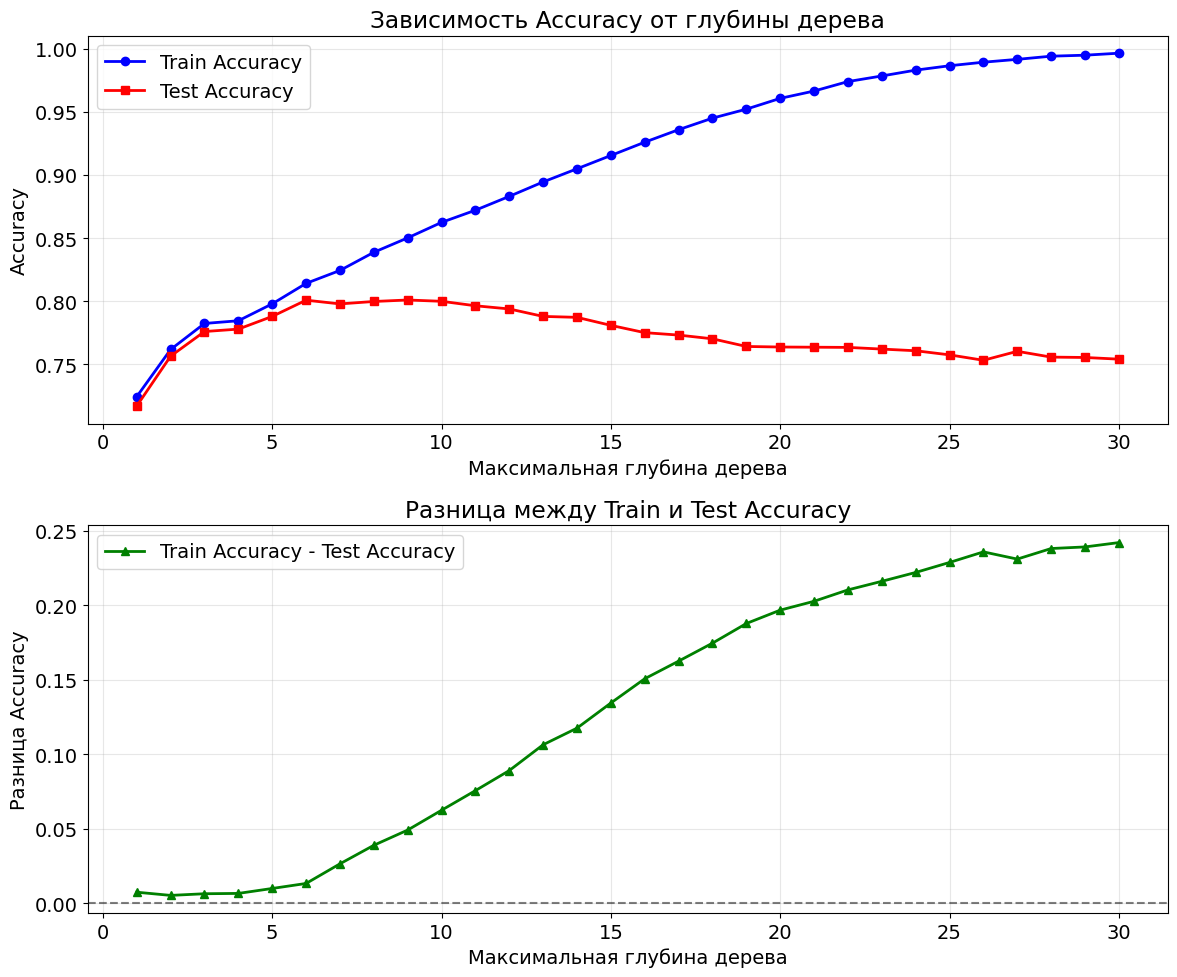

In [183]:
# Создаем сетку параметров для перебора глубины
param_grid = {'max_depth': list(range(1, 31))}  # перебираем глубины от 1 до 30

# Создаем и обучаем GridSearchCV
grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=42
    ),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,  # сохраняем результаты на тренировочных данных
    n_jobs=-1
)

# Обучаем GridSearch
grid_search.fit(X_train, y_train)

print('Результаты на тестовой выборке:\n{}'.format(metrics.classification_report(y_test, y_test_pred)))

# Получаем результаты
results = grid_search.cv_results_
depths = param_grid['max_depth']
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']
differences = train_scores - test_scores  # разница между train и test accuracy

# Создаем график с двумя subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Первый график: Accuracy
ax1.plot(depths, train_scores, label='Train Accuracy', marker='o', linewidth=2, color='blue')
ax1.plot(depths, test_scores, label='Test Accuracy', marker='s', linewidth=2, color='red')
ax1.set_xlabel('Максимальная глубина дерева')
ax1.set_ylabel('Accuracy')
ax1.set_title('Зависимость Accuracy от глубины дерева')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Второй график: Разница между Train и Test Accuracy
ax2.plot(depths, differences, label='Train Accuracy - Test Accuracy', 
         marker='^', linewidth=2, color='green')
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_xlabel('Максимальная глубина дерева')
ax2.set_ylabel('Разница Accuracy')
ax2.set_title('Разница между Train и Test Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Задание 5

In [184]:
# подберите оптимальные параметры с помощью gridsearch

param_grid = {
    'min_samples_split': [2, 5, 7, 10],
    'max_depth': [3,5,7]}

# Создаем и обучаем GridSearchCV
grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=42
    ),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)
print("F1-мерая: {:.2f}".format(metrics.f1_score(y_test, y_test_pred)))
print(grid_search.best_params_)

F1-мерая: 0.78
{'max_depth': 7, 'min_samples_split': 10}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [185]:
# обучите на ваших данных случайный лес
rf_class = ensemble.RandomForestClassifier(
    n_estimators = 100,
    criterion = 'gini',
    min_samples_leaf = 5,
    max_depth = 10,
    random_state = 42
)
rf_class.fit(X_train, y_train)
y_test_pred = rf_class.predict(X_test)


print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задания 2 и 3

In [186]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

gb_class = ensemble.GradientBoostingClassifier(
    learning_rate = 0.05,
    n_estimators = 300,
    min_samples_leaf = 5,
    max_depth = 5,
    random_state = 42
)
gb_class.fit(X_train, y_train)
y_test_pred = gb_class.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1790
           1       0.80      0.83      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.83      0.82      0.82      3335



- более качетвенный прогноз дает случайный лес

### Задание 4

In [187]:
# объедините уже известные вам алгоритмы с помощью стекинга 

# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=42)),
    
    ('lg', linear_model.LogisticRegression(
    solver='sag',
    random_state=42,
    max_iter=1000,
    n_jobs=-1)),
    
    ('gb', ensemble.GradientBoostingClassifier(
    learning_rate = 0.05,
    n_estimators = 300,
    min_samples_leaf = 5,
    max_depth = 5,
    random_state = 42))
]

# Создаем объект класса стекинг
stack = ensemble.StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(
    solver='sag',
    random_state=42,
    max_iter=1000,
    n_jobs=-1))

# Обучаем модель
stack.fit(X_train, y_train)

y_test_pred = stack.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))



              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1790
           1       0.81      0.80      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 5

In [188]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

estimator = gb_class
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
print("Три самых влиятельных признака: {}".format(selector.get_feature_names_out()))
print(X.columns)
print(selector.ranking_)

Три самых влиятельных признака: ['x0' 'x3' 'x13']
Index(['balance', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
[ 1  4 10  1  6  3 11 13  2  5  9  7  8  1 12]


### Задания 6,7,8

In [189]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))

  return score

# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

# выводим результаты на обучающей выборке
print("\nНаилучшие значения гиперпараметров {}".format(study.best_params))

[I 2025-09-16 16:34:27,343] A new study created in memory with name: RandomForestClassifier
[I 2025-09-16 16:34:28,242] Trial 0 finished with value: 0.8546132339235788 and parameters: {'n_estimators': 163, 'max_depth': 12, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8546132339235788.
[I 2025-09-16 16:34:29,179] Trial 1 finished with value: 0.8422855363537288 and parameters: {'n_estimators': 182, 'max_depth': 15, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8546132339235788.
[I 2025-09-16 16:34:30,206] Trial 2 finished with value: 0.8877742946708463 and parameters: {'n_estimators': 162, 'max_depth': 30, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.8877742946708463.
[I 2025-09-16 16:34:31,147] Trial 3 finished with value: 0.8531752223435793 and parameters: {'n_estimators': 174, 'max_depth': 10, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.8877742946708463.
[I 2025-09-16 16:34:31,788] Trial 4 finished with value: 0.8445692883895131 and parameters: {'n_


Наилучшие значения гиперпараметров {'n_estimators': 101, 'max_depth': 23, 'min_samples_leaf': 2}


In [190]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print("accuracy на тестовом наборе: {:.2f}".format(metrics.accuracy_score(y_test, y_test_pred)))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.82
f1_score на тестовом наборе: 0.81
